# 该文档，描述对Slide-Seq V2数据集的处理方式

In [3]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os

sc.set_figure_params(figsize=(4, 4))

### 导入我们从[SODB](https://gene.ai.tencent.com/SpatialOmics/dataset?datasetID=1)上下载到的小鼠海马体数据集

C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


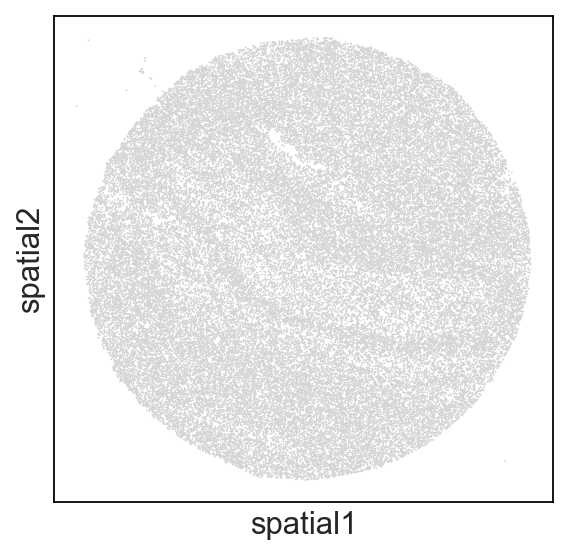

C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


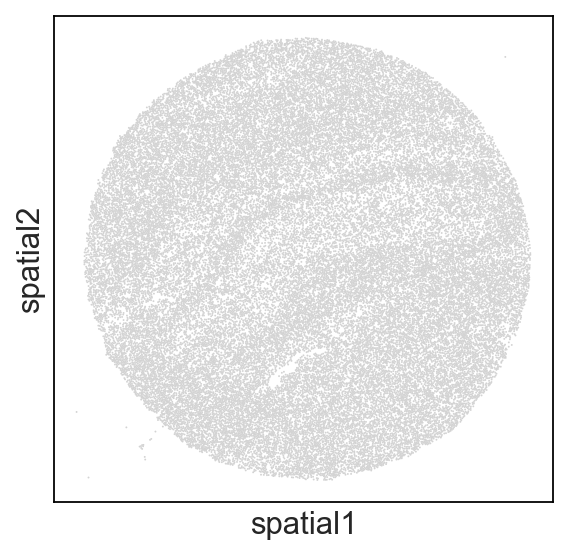

In [4]:
# 导入数据集
adata = sc.read_h5ad('D:/st_projects/data/slide_seq/v2/hippocampus/slideseqv2.h5ad')
sc.pl.embedding(adata, basis='spatial')
# 我们在DLPFC中已经可视化过，直接使用sc.pl.embedding代码展示的y轴坐标与实际是相反的。因此，我们手动翻转y轴
adata.obsm['spatial'][:, 1] = -adata.obsm['spatial'][:, 1]
### 注意，使用sc.pl.embedding时，需要指定basis='spatial'。这里，spatial是存储在adata.obsm中的空间位置信息
sc.pl.embedding(adata, basis='spatial')

### 从SODB上下载到的数据集，大部分都是有使用scanpy的leiden图聚类算法得到的图聚类标签来标注的。我们看obs对象中有那些信息 

In [6]:
adata.obs

barcode        x       y  n_genes_by_counts  \
AACGTCATAATCGT  AACGTCATAATCGT   888.95  3219.5               6539   
TACTTTAGCGCAGT  TACTTTAGCGCAGT  4762.20  5020.4               6017   
CATGCCTGGGTTCG  CATGCCTGGGTTCG   886.50  3199.6               5319   
TCGATATGGCACAA  TCGATATGGCACAA  2237.10  5144.6               5554   
TTATCTGACGAAGC  TTATCTGACGAAGC  1031.80  2425.2               4946   
...                        ...      ...     ...                ...   
CACCCGATGACTCC  CACCCGATGACTCC  4314.40  1770.1                100   
CTTGATTAGGCAGG  CTTGATTAGGCAGG  1452.50  3013.1                108   
GAGTTCCTAAGCGG  GAGTTCCTAAGCGG  3090.10  2045.0                103   
GCGCTCAGTGCTCT  GCGCTCAGTGCTCT  3304.10  3491.5                112   
GAGATAACAGTTCC  GAGATAACAGTTCC  4902.30  4354.1                 88   

                log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AACGTCATAATCGT                 8.785692       23772.0           10.076305   
TACTTTAGCGCAGT                 8.702510       19661.0            9.886443   
CATGCCTGGGTTCG                 8.579229       15999.0            9.680344   
TCGATATGGCACAA                 8.622454       15069.0            9.620461   
TTATCTGACGAAGC                 8.506537       14013.0            9.547812   
...                                 ...           ...                 ...   
CACCCGATGACTCC                 4.615121         120.0            4.795791   
CTTGATTAGGCAGG                 4.691348         127.0            4.852030   
GAGTTCCTAAGCGG                 4.644391         114.0            4.744932   
GCGCTCAGTGCTCT                 4.727388         115.0            4.753590   
GAGATAACAGTTCC                 4.488636         103.0            4.644391   

                pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AACGTCATAATCGT                   16.902238                    22.311964   
TACTTTAGCGCAGT                   19.744672                    24.698642   
CATGCCTGGGTTCG                   16.463529                    22.182636   
TCGATATGGCACAA                   13.783264                    19.092176   
TTATCTGACGAAGC                   16.984229                    22.664669   
...                                    ...                          ...   
CACCCGATGACTCC                   58.333333                   100.000000   
CTTGATTAGGCAGG                   54.330709                    93.700787   
GAGTTCCTAAGCGG                   53.508772                    97.368421   
GCGCTCAGTGCTCT                   46.086957                    89.565217   
GAGATAACAGTTCC                   63.106796                   100.000000   

                pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AACGTCATAATCGT                    29.559987                    42.756184   
TACTTTAGCGCAGT                    31.488734                    44.428056   
CATGCCTGGGTTCG                    29.776861                    43.990249   
TCGATATGGCACAA                    26.212755                    40.467184   
TTATCTGACGAAGC                    30.207664                    44.287447   
...                                     ...                          ...   
CACCCGATGACTCC                   100.000000                   100.000000   
CTTGATTAGGCAGG                   100.000000                   100.000000   
GAGTTCCTAAGCGG                   100.000000                   100.000000   
GCGCTCAGTGCTCT                   100.000000                   100.000000   
GAGATAACAGTTCC                   100.000000                   100.000000   

                total_counts_MT  log1p_total_counts_MT  pct_counts_MT  \
AACGTCATAATCGT            958.0               6.865891       4.029951   
TACTTTAGCGCAGT           1579.0               7.365180       8.031128   
CATGCCTGGGTTCG            707.0               6.562444       4.419026   
TCGATATGGCACAA            544.0               6.300786       3.610060   
TTATCTGACGAAGC            681.0               6.525030       4.859773   
...  

### 从上表中可以看到，该数据集甚至还有手工的cluster注释标签。我们将其在空间上可视化

C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


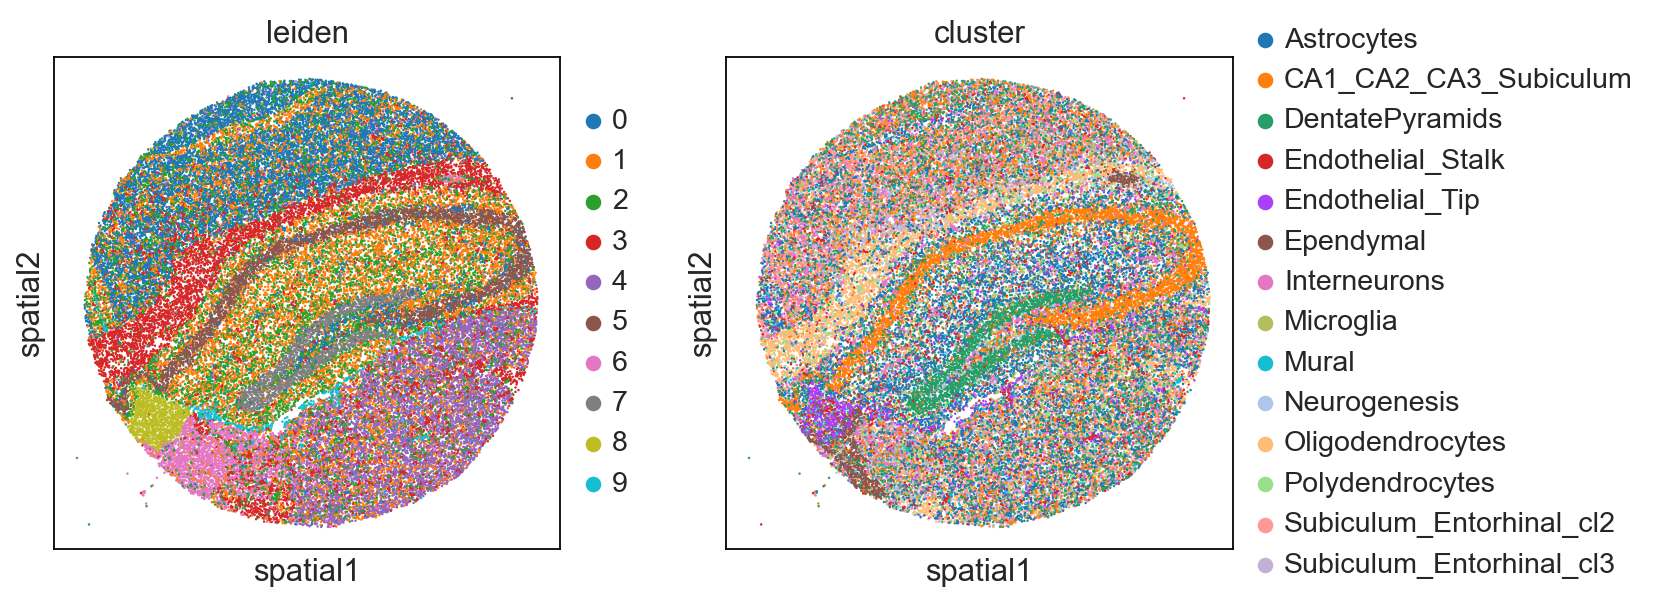

In [19]:
sc.pl.embedding(adata, basis='spatial', color=['leiden', 'cluster'], size=5)

### 验证数据是否经过预处理。一般而言，未预处理的数据中，基因表达为整数。我们直接输出每个spot的总表达量，发现其已经经过了预处理。

In [16]:
adata.X.sum(1)

matrix([[72.6427  ],
        [67.25418 ],
        [72.31892 ],
        ...,
        [27.177238],
        [44.83063 ],
        [16.475376]], dtype=float32)

### 我们直接使用SpaGCN进行空间聚类，与obs中存储的leiden聚类结果，与人工标注的cluster信息进行对比

In [20]:
import SpaGCN as spg
spg.__version__

'1.2.7'

### 使用SpaGCN原文中预定义的参数,将p设为1，代表邻居节点与当前节点相等重要。p越小，则邻居节点重要性越小

In [21]:
p = 1
x_array = adata.obsm['spatial'][:, 0]
y_array = adata.obsm['spatial'][:, 1]

adj = spg.calculate_adj_matrix(x=x_array, y=y_array, histology=False)
l = spg.search_l(p, adj)

Calculateing adj matrix using xy only...
Run 1: l [0.01, 1000], p [0.0, 9621.803789166002]
Run 2: l [0.01, 500.005], p [0.0, 3004.595947265625]
Run 3: l [0.01, 250.0075], p [0.0, 834.640625]
Run 4: l [0.01, 125.00874999999999], p [0.0, 219.38902282714844]
Run 5: l [0.01, 62.509375], p [0.0, 55.92156982421875]
Run 6: l [0.01, 31.2596875], p [0.0, 13.725439071655273]
Run 7: l [0.01, 15.63484375], p [0.0, 2.9932801723480225]
Run 8: l [7.822421875, 15.63484375], p [0.33781635761260986, 2.9932801723480225]
Run 9: l [7.822421875, 11.728632812499999], p [0.33781635761260986, 1.419330358505249]
Run 10: l [9.77552734375, 11.728632812499999], p [0.8081824779510498, 1.419330358505249]
Run 11: l [9.77552734375, 10.752080078125], p [0.8081824779510498, 1.0981671810150146]
Run 12: l [10.263803710937498, 10.752080078125], p [0.9491227865219116, 1.0981671810150146]
Run 13: l [10.263803710937498, 10.50794189453125], p [0.9491227865219116, 1.022655725479126]
Run 14: l [10.385872802734374, 10.50794189453

### 根据adata.obs['cluster']中的注释信息，我们将聚类数设为14

In [22]:
n_cluster = 14
# 设置随机种子
r_seed = t_seed = n_seed = 2042
# 根据聚类数，为图聚类算法寻找合适的分辨率参数
res = spg.search_res(adata, adj, l, n_cluster, r_seed=r_seed, t_seed=t_seed, n_seed=n_seed)

Start at res =  0.4 step =  0.1
Initializing cluster centers with louvain, resolution =  0.4


C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch  0
Res =  0.4 Num of clusters =  9
Initializing cluster centers with louvain, resolution =  0.5
Epoch  0
Res =  0.5 Num of clusters =  10
Res changed to 0.5
Initializing cluster centers with louvain, resolution =  0.6
Epoch  0
Res =  0.6 Num of clusters =  11
Res changed to 0.6
Initializing cluster centers with louvain, resolution =  0.7
Epoch  0
Res =  0.7 Num of clusters =  13
Res changed to 0.7
Initializing cluster centers with louvain, resolution =  0.7999999999999999
Epoch  0
Res =  0.7999999999999999 Num of clusters =  13
Res changed to 0.7999999999999999
Initializing cluster centers with louvain, resolution =  0.8999999999999999
Epoch  0
Res =  0.8999999999999999 Num of clusters =  14
recommended res =  0.8999999999999999


### 开始执行SpaGCN算法部分

In [23]:
import random
import torch
import numpy as  np

# 将控制邻居节点贡献的l设置给SpaGCN
clf = spg.SpaGCN()
clf.set_l(l)
# 设置随机种子
random.seed(r_seed)
torch.manual_seed(t_seed)
np.random.seed(n_seed)
# 执行算法,设定SpaGCN最多执行500次
clf.train(adata, adj, init_spa=True, init='louvain', res=res, tol=5e-3, lr=5e-2, max_epochs=500)
y_pred, prob = clf.predict()
# 将预测结果存储进adata.obs['pred']中
adata.obs['pred'] = y_pred
# 将结果的数据类型变为category离散类型，使scanpy将其作为离散变量，而非连续变量来可视化
adata.obs['pred'] = adata.obs['pred'].astype('category')

Initializing cluster centers with louvain, resolution =  0.8999999999999999
Epoch  0
Epoch  10
Epoch  20
Epoch  30
Epoch  40
Epoch  50
Epoch  60
Epoch  70
Epoch  80
Epoch  90
Epoch  100
Epoch  110
Epoch  120
Epoch  130
Epoch  140
Epoch  150
Epoch  160
Epoch  170
Epoch  180
Epoch  190
Epoch  200
Epoch  210
Epoch  220
Epoch  230
Epoch  240
Epoch  250
Epoch  260
Epoch  270
Epoch  280
Epoch  290
Epoch  300
Epoch  310
Epoch  320
Epoch  330
Epoch  340
Epoch  350
delta_label  0.0046187718374575215 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 358


### 在空间上，进行结果的可视化对比。可以看到，空间聚类算法SpaGCN识别到的空间域更加连贯，还有效识别到了'CA1_CA2_CA3'中存在的子簇。而注释信息，与non-spatial的SCANPY-leiden算法无法做到这一点。

C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


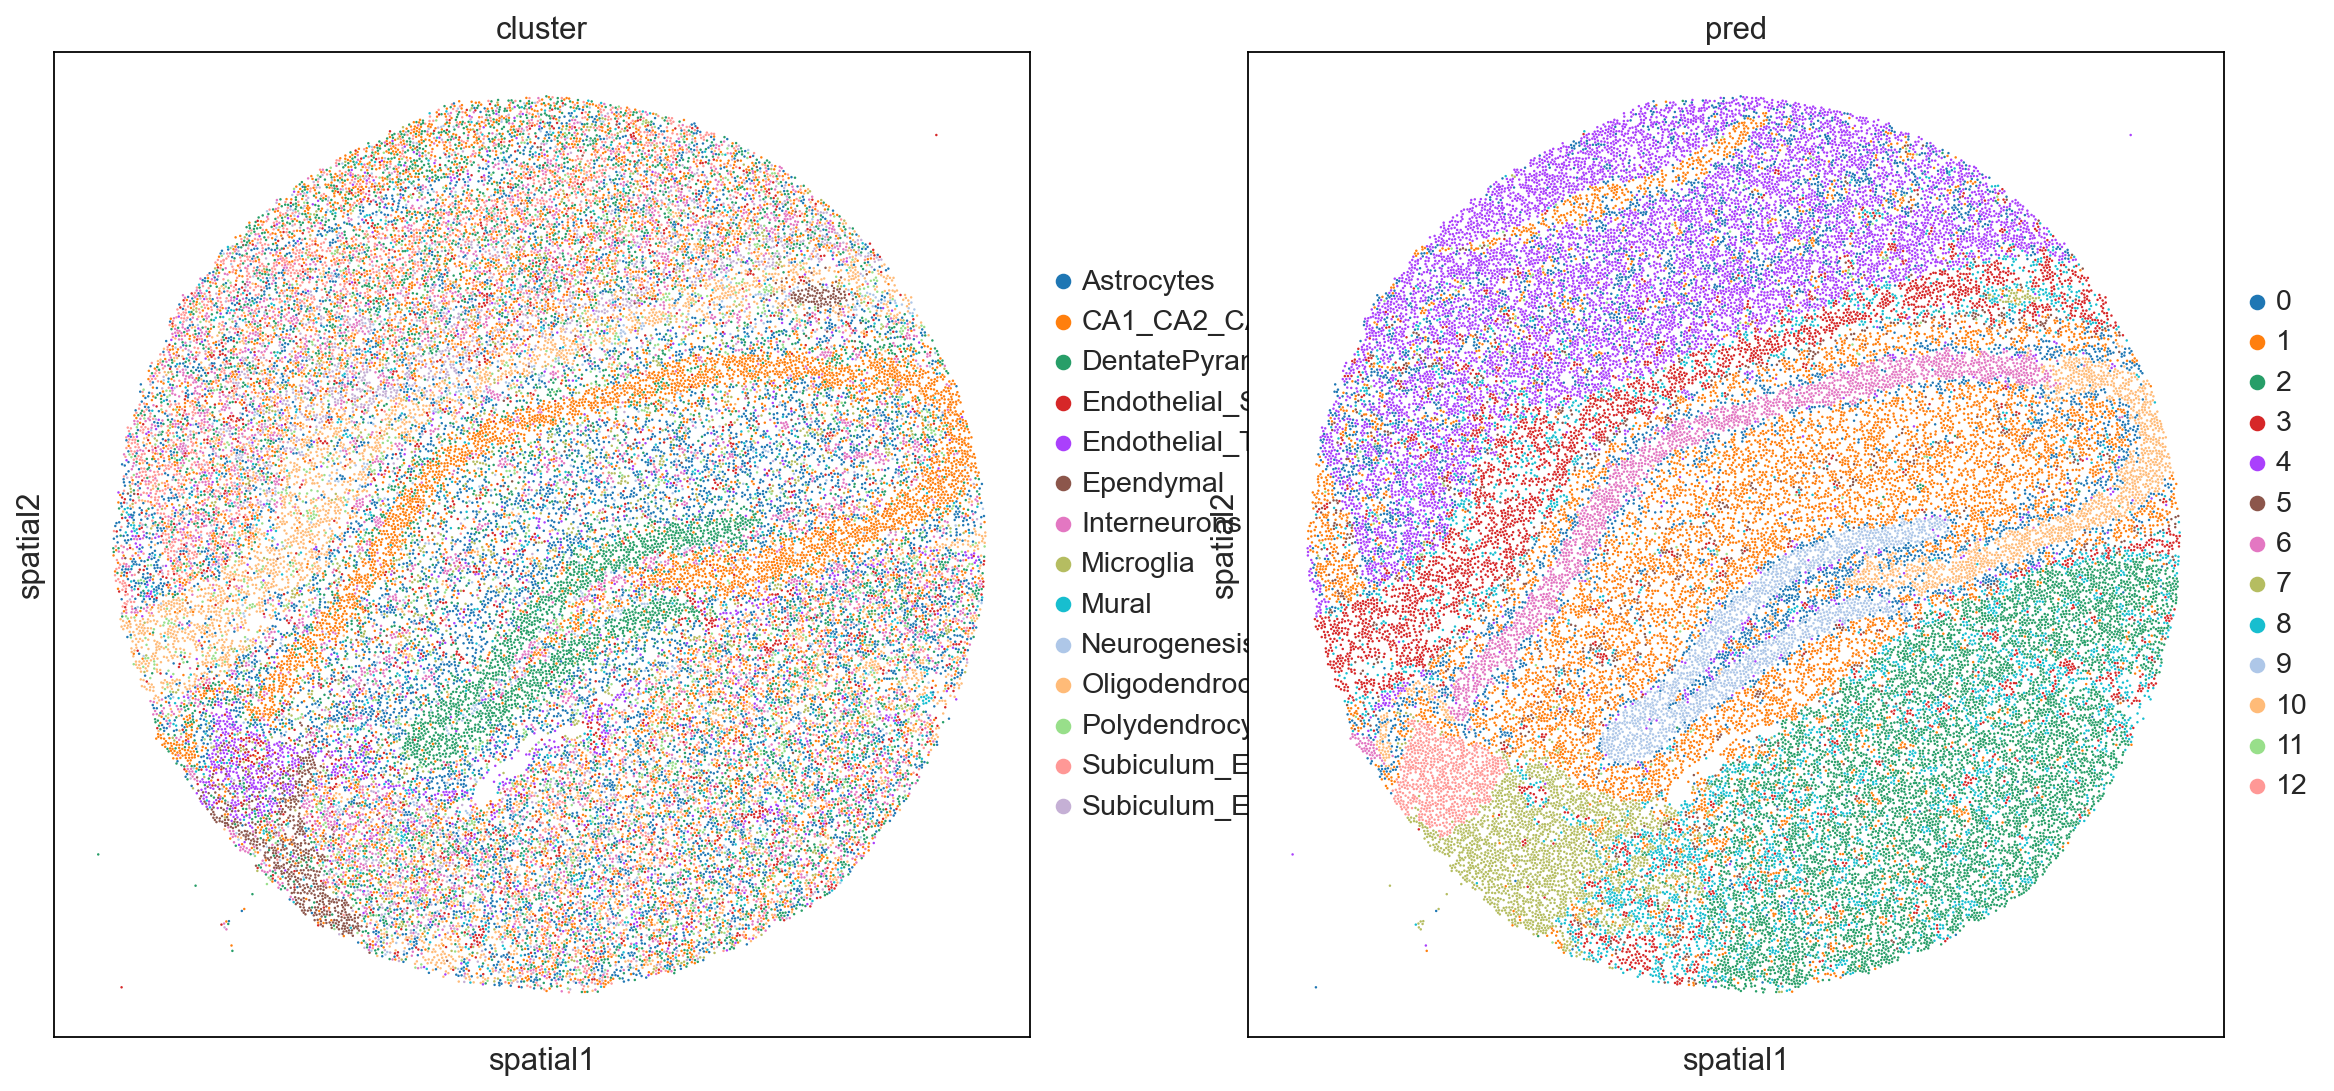

In [30]:
sc.set_figure_params(figsize=(8, 8))
sc.pl.embedding(adata, basis='spatial', color=['cluster', 'pred'], size=5)